# Exploratory Data Analysis (EDA)

This notebook explores key behavioral patterns in the last-mile delivery dataset, based on the cleaned data prepared in `data_preparation.ipynb`.

In [114]:
import pandas as pd

df = pd.read_csv('../data/amazon_delivery_cleaned.csv')
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Area,Delivery_Time,Category,order_datetime,pickup_datetime,delivery_datetime,distance_km,order_to_pickup_mins,pickup_to_delivery_mins,total_fulfillment_mins
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,Urban,120,Clothing,2022-03-19 11:30:00,2022-03-19 11:45:00,2022-03-19 13:45:00,3.025149,15.0,120.0,135.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Metropolitian,165,Electronics,2022-03-25 19:45:00,2022-03-25 19:50:00,2022-03-25 22:35:00,20.183530,5.0,165.0,170.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Urban,130,Sports,2022-03-19 08:30:00,2022-03-19 08:45:00,2022-03-19 10:55:00,1.552758,15.0,130.0,145.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Metropolitian,105,Cosmetics,2022-04-05 18:00:00,2022-04-05 18:10:00,2022-04-05 19:55:00,7.790401,10.0,105.0,115.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,Metropolitian,150,Toys,2022-03-26 13:30:00,2022-03-26 13:45:00,2022-03-26 16:15:00,6.210138,15.0,150.0,165.0


## 1. Distribution of Delivery Duration

A histogram of `pickup_to_delivery_mins` was plotted to understand the overall distribution of delivery times. Most deliveries were completed within a certain time range, but long-tail values were also observed, indicating outliers or delays.

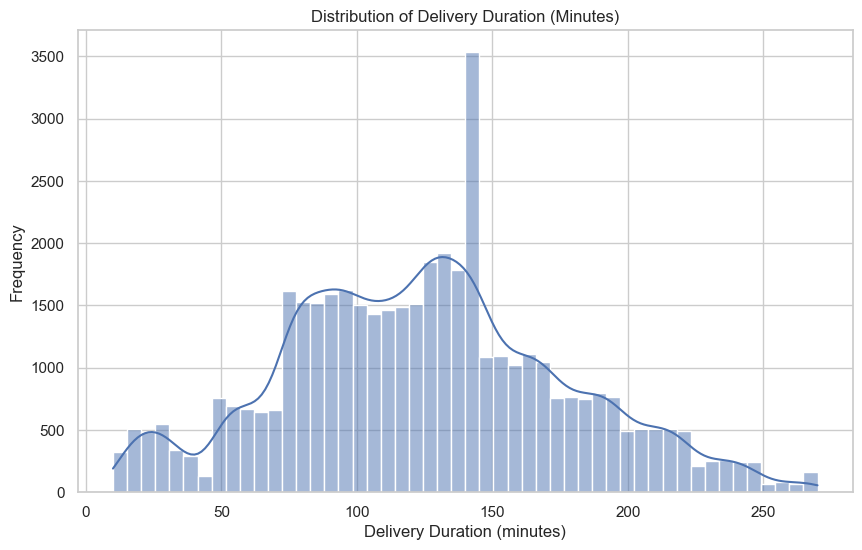

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot histogram of delivery duration
plt.figure(figsize=(10, 6))
sns.histplot(df['pickup_to_delivery_mins'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration (Minutes)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [42]:
# get the most frequent delivery duration range

bin_counts = pd.cut(df['pickup_to_delivery_mins'], bins=50).value_counts().sort_values(ascending=False)
print(bin_counts.head())

pickup_to_delivery_mins
(134.8, 140.0]    3563
(129.6, 134.8]    1917
(124.4, 129.6]    1850
(140.0, 145.2]    1752
(93.2, 98.4]      1624
Name: count, dtype: int64


### 1.1 Drilldown: Most Frequent Delivery Time Range

Using binned value counts, the most frequent delivery duration range was identified as **134.8 to 140.0 minutes**, representing 3,563 deliveries. This range was isolated and analyzed by `Area` and `Category` to uncover patterns that might explain the clustering.

In [43]:
# filter the most frequent delivery duration range
df_spike = df[(df['pickup_to_delivery_mins'] > 134.8) & (df['pickup_to_delivery_mins'] <= 140.0)]

In [44]:
# analyze by area and category
df_spike.groupby(['Area', 'Category']).size().sort_values(ascending=False)

Area           Category    
Metropolitian  Jewelry         210
               Snacks          203
               Electronics     202
               Sports          200
               Pet Supplies    195
               Books           193
               Cosmetics       192
               Kitchen         189
               Skincare        187
               Apparel         187
               Clothing        184
               Outdoors        183
               Home            179
               Toys            173
               Shoes           165
Urban          Electronics      59
               Jewelry          58
               Home             53
               Skincare         50
               Apparel          49
               Shoes            49
               Outdoors         43
               Sports           42
               Kitchen          42
               Books            42
               Toys             37
               Snacks           36
               Pet Supplies

### 1.2 Insights: Area vs Category Influence

The grouped bar chart revealed that the concentration of deliveries in the 134.8 - 140.0 minute range is strongly associated with the `Area`, while the `Category` shows no significant pattern. Most of the deliveries within this time frame occured in the Metropolitan area, suggesting potential regional operational or logistical factors influencing delivery duration.

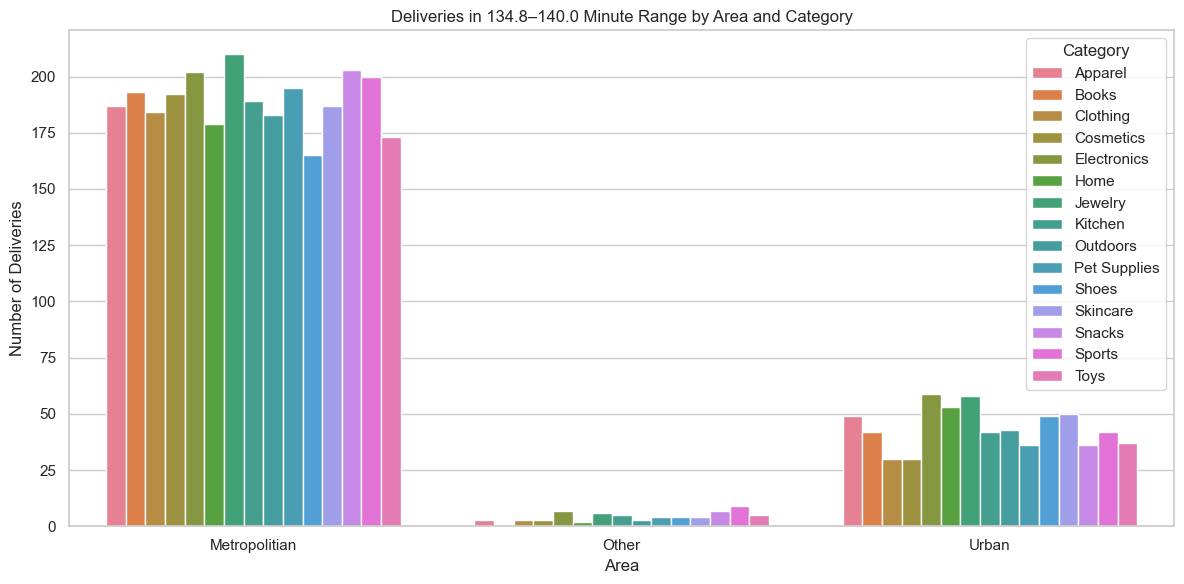

In [45]:
# Count by Area and Category within the spike range
spike_counts = df_spike.groupby(['Area', 'Category']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=spike_counts, x='Area', y='count', hue='Category')
plt.title('Deliveries in 134.8–140.0 Minute Range by Area and Category')
plt.xlabel('Area')
plt.ylabel('Number of Deliveries')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.3 Distribution by Area

To further examine how delivery duration varies across areas, individual histograms were plotted for each `Area`. This allows for side-by-side comparison of distribution shapes, central tendencies, and variability.

In [46]:
# get unique values of Area
areas = df['Area'].unique()
n_areas = len(areas)

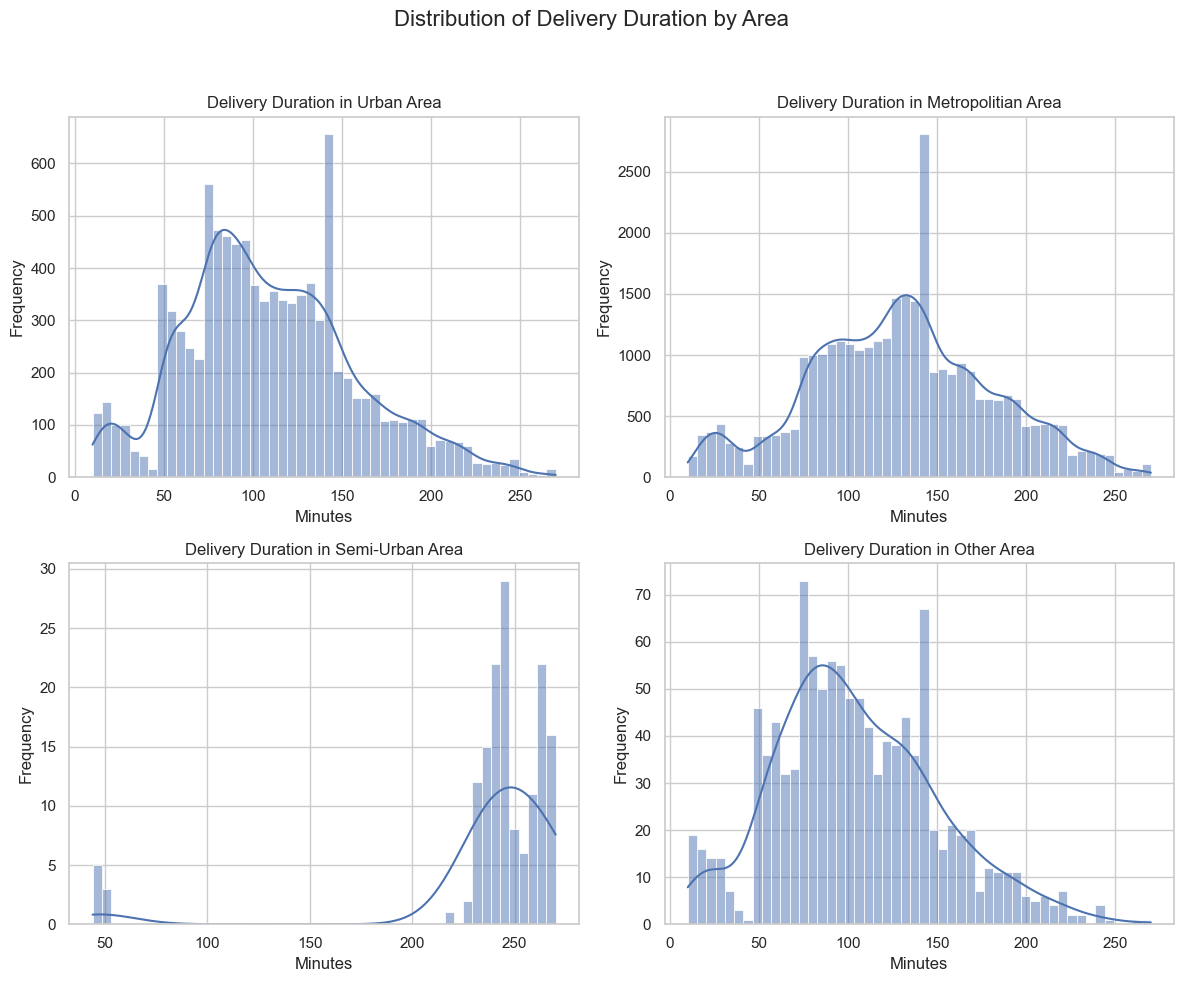

In [47]:
import math

# calculate number of rows and columns for grid
n_cols = 2
n_rows = math.ceil(n_areas / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten() # flatten the 2D array to simplify indexing

    
# plot one histogram per area
for i, area in enumerate(areas):
    subset = df[df['Area'] == area]
    sns.histplot(subset['pickup_to_delivery_mins'], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Delivery Duration in {area} Area')
    axes[i].set_xlabel('Minutes')
    axes[i].set_ylabel('Frequency')
    
# hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.suptitle('Distribution of Delivery Duration by Area', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Note**

A significant spike in delivery duration between 134.8 - 140.0 minutes was consistently observed across both Urban and Metropolitan areas. Since the cause did not appear to correlate with delivery category, further analysis could explore temporal or operational patterns. However, this was not deemed a blocker for continuing broader behavioral analysis. 

## 2. Impact of Traffic on Delivery Duration

Traffic congestion is a common real-world constraint in last-mile delivery. This analysis examined how delivery duration varies across reported traffic levels.

In [115]:
# quick value check
df['Traffic'].value_counts()

Traffic
Low       14999
Jam       13725
Medium    10628
High       4296
Name: count, dtype: int64

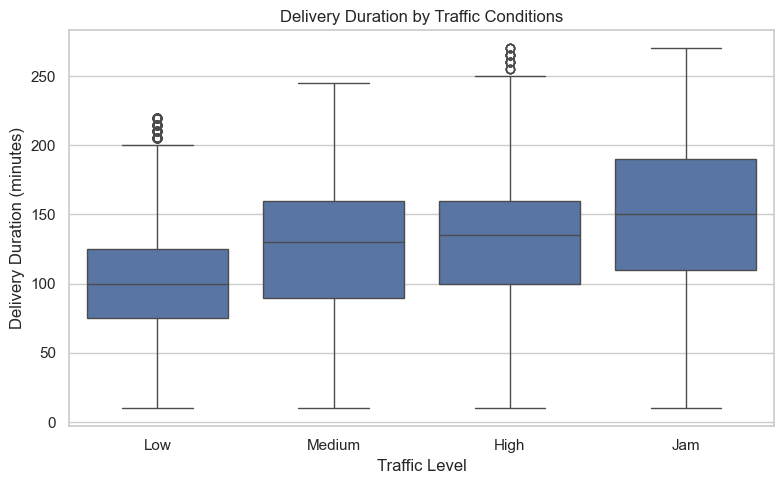

In [55]:
# order categorical column
df['Traffic'] = pd.Categorical(df['Traffic'], categories=['Low', 'Medium', 'High', 'Jam'], ordered=True)

# visualize
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Traffic', y='pickup_to_delivery_mins')
plt.title('Delivery Duration by Traffic Conditions')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

A boxplot revealed that deliveries during high-traffic (High and Jam) conditions tend to have longer and more variable delivery times, suggesting a strong operational impact. This insight can guide traffic-aware routing strategies and delivery time predictions.

## 3. Delivery Duration by Hour of Day

Delivery efficiency can vary by time of day due to traffic, order volume, and operational cycles. This analysis grouped delivery records by `order_hour` to assess how average delivery time changes throughout the day. The results can help inform optimal delivery windows, fleet scheduling, and peak-hour planning.

In [56]:
# extract hour from the order time
df['order_hour'] = pd.to_datetime(df['order_datetime']).dt.hour

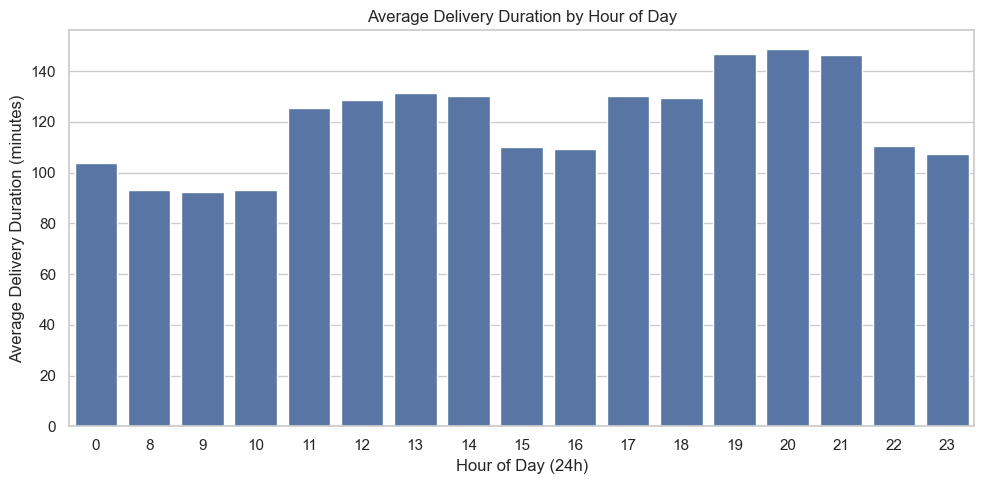

In [58]:
# visualize average delivery duration per hour
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='order_hour', y='pickup_to_delivery_mins', errorbar=None)
plt.title('Average Delivery Duration by Hour of Day')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Average Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

The analysis showed that deliveries between 8:00-10:00 AM had the shortest average delivery durations, likely due to lighter traffic and lower order volume. In contrast, deliveries during 11:00–13:00 and 19:00–21:00 exhibited significantly longer durations. These periods likely overlap with lunch and evening commute times, resulting in higher traffic congestion and increased order density. These insights highlight the importance of hour-level planning in last-mile logistics.

### 3.1 Drilldown: at which hours is traffic making the biggest difference in delivery time?

To explore how traffic levels influence delivery duration across different hours, delivery records were grouped by both `order_hour` and `Traffic`. A multi-line chart was created to show average delivery duration per hour for each traffic level. The visualization helps identify which time windows are most affected by congestion and can guide time-aware delivery planning.

In [63]:
palette ={
    'Low': '#1f77b4',
    'Medium': '#2ca02c',
    'High': '#ff7f0e',
    'Jam': '#d62728'
}

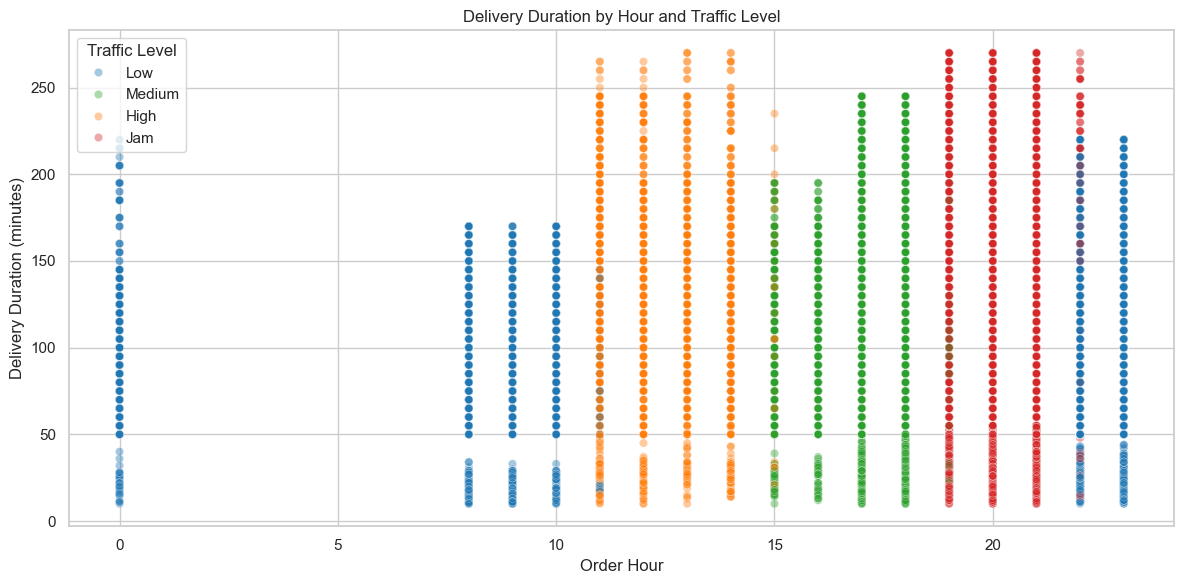

In [89]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='order_hour', y='pickup_to_delivery_mins', 
              hue='Traffic', alpha=0.4, palette=palette)
plt.title('Delivery Duration by Hour and Traffic Level')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Duration (minutes)')
plt.legend(title='Traffic Level', loc='upper left')
plt.tight_layout()
plt.show()

The scatter plot provides a granular view of individual delivery durations across each hour of the day, segmented by traffic level. Deliveries made during low traffic conditions (blue) are most common in the early morning hours and tend to be faster and more consistent. In contrast, deliveries under high or jammed traffic (orange/red) are heavily concentrated between 16:00 and 21:00 and exhibit noticeably longer durations. The spread of data points becomes significantly wider during evening hours, indicating increased variability and potential operational inefficiencies during peak traffic periods.

## 4. Delivery Duration based on Weather Conditions

This analysis is to understand how different weather conditions impact delivery time. It can help adjust ETA predictions dynamically, inform routing decisions, optimize resource planning and provide context for delays.

In [116]:
# check weather data distribution
df['Weather'].value_counts()

Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

In [119]:
# convert to categorical
df['Weather'] = pd.Categorical(df['Weather'], ordered=False)
weather_counts = df['Weather'].value_counts().reindex(df['Weather'].cat.categories)

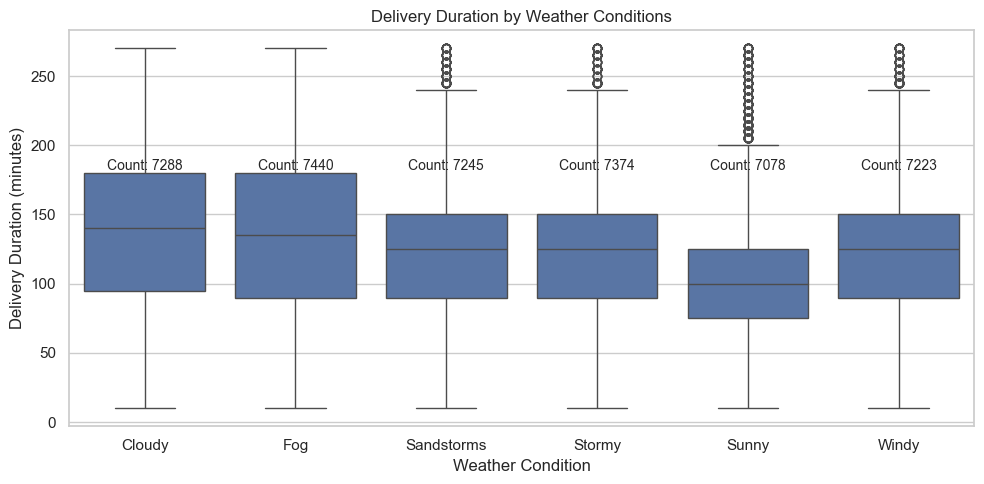

In [127]:
# visualize
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Weather', y='pickup_to_delivery_mins')
# loop through each box to annotate
for i, count in enumerate(weather_counts):
    plt.text(i, 180, f'Count: {count}', ha='center', va='bottom', fontsize=10)
plt.title('Delivery Duration by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

In [128]:
weather_avg = df.groupby('Weather', observed=True)['pickup_to_delivery_mins'].mean().reset_index()

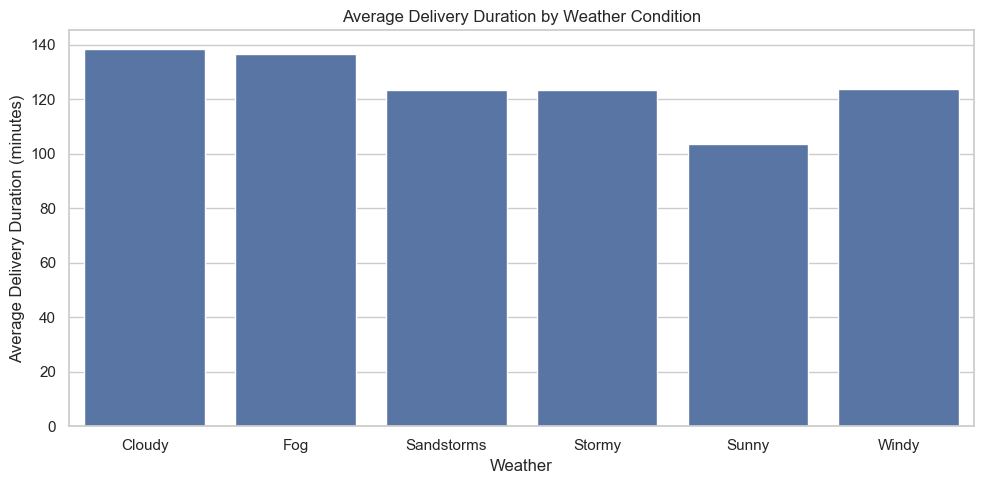

In [129]:
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_avg, x='Weather', y='pickup_to_delivery_mins')
plt.title('Average Delivery Duration by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

The boxplot and bar chart analyses revealed how delivery performance varies under different weather conditions:

- **Sunny** weather resulted in the **shortest and most consistent delivery durations**, with a narrow inter-quartile range and fewer extreme delays, indicating smooth operational flow.
- **Fog** and **Cloudy** conditions were associated with the **longest and most variable delivery durations**, likely due to reduced visibility and slower travel speeds. These categories showed higher medians (around 140–150 minutes) and a wider spread of outliers.
- **Sandstorms, Stormy, and Windy** conditions fell in between. While these weather types also showed some delays, their variability was less extreme compared to fog or cloudy conditions.

Additionally, sample sizes were annotated for each weather category to provide transparency into the distribution of records.

## 5. Delivery Duration by Vehicle Type

Different vehicles (e.g., motorcycle, car, bicycle) may perform differently depending on traffic density, urban/rural infrastructure, delivery load and distance. Understanding performance by vehicle type helps optimize fleet allocation, improve vehicle assignment logic and support cost and time eficiency analysis.

In [130]:
# check vehicle type distribution
df['Vehicle'].value_counts()

Vehicle
motorcycle    25519
scooter       14607
van            3522
Name: count, dtype: int64

In [131]:
# convert to categorical
df['Vehicle'] = pd.Categorical(df['Vehicle'], ordered=False)

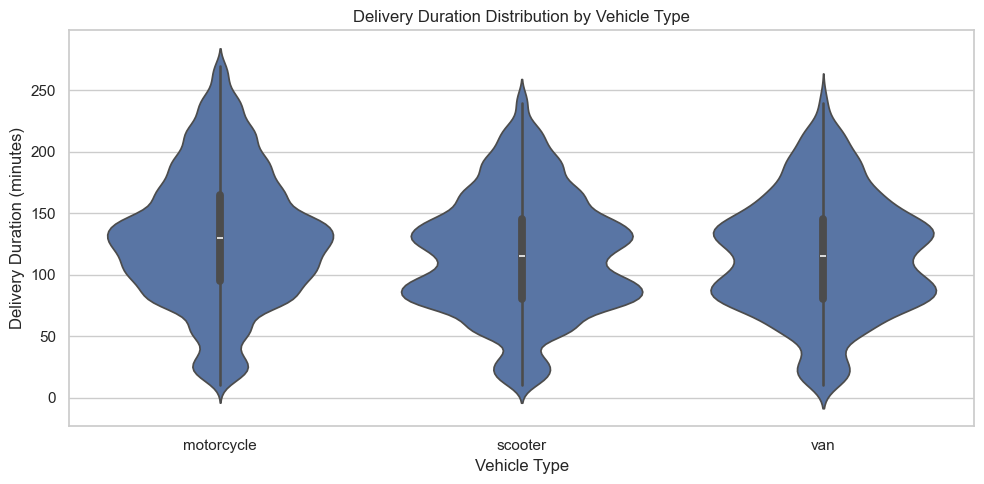

In [133]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Vehicle', y='pickup_to_delivery_mins', inner='box')
plt.title('Delivery Duration Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

The violin plot revealed that the distribution of delivery durations is **fairly consistent across all vehicle types**—motorcycle, scooter, and van. All three exhibited similar medians and distribution shapes, suggesting no significant performance advantage for any particular vehicle type. This may indicate effective routing and vehicle assignment strategies **already in place**, ensuring that each vehicle is used in conditions that minimize performance differences.

## 6. Impact of Agent on Delivery Duration

Understanding how agent characteristics relate to performance helps identify top-performing profiles, fine-tune agent training programs and validate if certain factors (age or rating) actually correlate with efficiency.

In [135]:
# quick check for rating distribution
df['Agent_Rating'].describe()

count    43648.000000
mean         4.635285
std          0.313632
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Agent_Rating, dtype: float64

In [136]:
# quick check for age distribution
df['Agent_Age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: Agent_Age, dtype: float64

Text(47.25, 0.5, 'Agent Age Group')

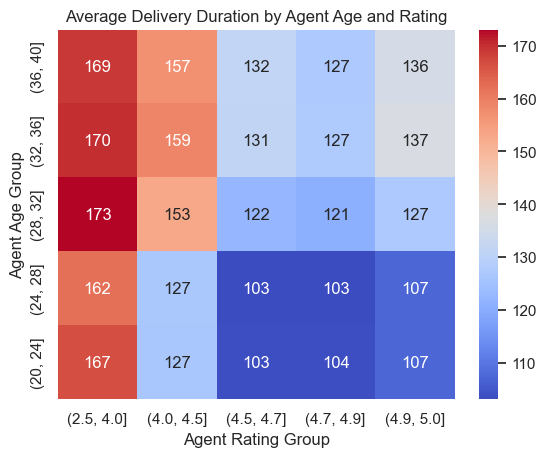

In [150]:
df['Age_Group'] = pd.cut(df['Agent_Age'], bins=[20, 24, 28, 32, 36, 40])
df['Rating_Group'] = pd.cut(df['Agent_Rating'], bins=[2.5, 4.0, 4.5, 4.7, 4.9, 5.0])

pivot = df.pivot_table(values='pickup_to_delivery_mins',
                       index='Age_Group', columns='Rating_Group',
                       aggfunc='mean', observed=True)
pivot = pivot.sort_index(ascending=False)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Delivery Duration by Agent Age and Rating')
plt.xlabel('Agent Rating Group')
plt.ylabel('Agent Age Group')

A heatmap was used to explore the combined effect of agent age and rating on delivery duration. The plot aggregated delivery durations into grouped bins of age and rating.

1. Agent Rating has a clear impact
    - Delivery durations decrease as ratings increase
    - Agents rated **2.5-4.0** took **160-173 mins** to deliver in average
    - Agents rated **4.9-5.0** took **107-137 mins** to deliver in average, much faster
    This confirms that **higher-rated agents deliver faster*, regardless of age
2. Age has a mild influence
    - For each rating group, delivery duration slightly increases with age. In the **4.5-4.7 rating group**, the 20-24 age group averaged **103 mins**, while **36-40 aged agents** averaged **132 mins**.
    - But this trend is not as strong as rating effect
    - Younger agents may perform slightly faster, but it's subtle
3. The slowest performance occurs at low ratings and mid-age
    - The cell with the **highest average duration (173 mins)** is for agents aged **28-32** with **low ratings (2.5-4.0)**
    - This might indicate a good spot for performance improvement through training or support

## 7. Operational Insights and Recommendations

Based on the exploratory data analysis, several actionable insights were identified to support decision-making in last-mile delivery operations:

### Peak Delivery Delays Align with Rush Hours
- Delivery durations are significantly longer between **11:00–13:00** and **19:00–21:00**, likely due to lunch and evening traffic congestion.
- **Recommendation**: Consider adjusting delivery windows, increasing fleet availability, or rerouting to minimize delays during these peak periods.

### Traffic and Weather Strongly Impact Efficiency
- **High and Jam traffic levels** correlate with noticeably longer delivery times.
- Adverse weather conditions (especially **fog and cloudy**) lead to more variability and delays.
- **Recommendation**: Enhance ETA predictions by incorporating real-time traffic and weather data; build in buffer time during fog-prone hours.

### Regional Patterns in Delivery Spikes
- A recurring spike around **134.8–140.0 minutes** was most common in **Metropolitan** and **Urban** areas.
- **Recommendation**: Investigate routing patterns or fulfillment constraints specific to these areas that may be causing delivery clustering.

### Agent Performance is Linked to Rating (More than Age)
- Higher-rated agents consistently deliver faster, regardless of age.
- Younger agents may perform slightly better, but the effect is subtle.
- **Recommendation**: Reinforce quality standards by tying agent ratings to performance reviews or incentives; target retraining for low-rated agents.

### Vehicle Type Has Minimal Impact
- Delivery performance was consistent across vehicle types, suggesting effective routing and vehicle assignment.
- **Recommendation**: Maintain current assignment strategy but continue monitoring if new vehicle types are introduced.

### Weather-Responsive Planning Needed
- Foggy and cloudy conditions produce the most delays.
- **Recommendation**: Add weather-sensitivity into route planning logic, and communicate realistic delivery expectations to customers during such events.